In [1]:
import os
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical  # Corrected import
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential, model_from_json
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
import pickle

C:\Users\BHANU PRAKASH\.conda\envs\tf-gpu\lib\site-packages\h5py\__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "


In [2]:
os.chdir("D:\\DL\\")

In [3]:
path = 'Dataset1'

labels = []  
X_train = []  
Y_train = []  

def getID(name):
    index = 0
    for i in range(len(labels)):
        if labels[i] == name:
            index = i
            break
    return index
for root, dirs, directory in os.walk(path):
    for j in range(len(directory)):
        name = os.path.basename(root) 
        if name not in labels:
            labels.append(name)  
print(labels)

['license_plates_detection_train', 'license_plates_recognition_train', 'test']


In [19]:

base_dir = r'D:\DL-TASK'
detection_df = pd.read_csv(os.path.join(base_dir, 'Licplatesdetection_train.csv'))

recognition_df = pd.read_csv(os.path.join(base_dir, 'Licplatesrecognition_train.csv'))

submission_df = pd.read_csv(os.path.join(base_dir, 'SampleSubmission.csv'))

print("License Plate Detection Dataset:")
print(detection_df.head())

print("\nLicense Plate Recognition Dataset:")
print(recognition_df.head())

print("\nSample Submission Dataset:")
print(submission_df.head())

detection_df['ymin'] = detection_df['ymin'].astype(int)
detection_df['xmin'] = detection_df['xmin'].astype(int)
detection_df['ymax'] = detection_df['ymax'].astype(int)
detection_df['xmax'] = detection_df['xmax'].astype(int)

# Check for missing values in the datasets
print("\nMissing values in Detection Dataset:")
print(detection_df.isnull().sum())

print("\nMissing values in Recognition Dataset:")
print(recognition_df.isnull().sum())

print("\nMissing values in Submission Dataset:")
print(submission_df.isnull().sum())

# Step 5: Data Exploration
# Explore the distribution of bounding box sizes
detection_df['width'] = detection_df['xmax'] - detection_df['xmin']
detection_df['height'] = detection_df['ymax'] - detection_df['ymin']

print("\nBounding Box Width and Height Distribution:")
print(detection_df[['width', 'height']].describe())

# Explore the distribution of characters in the recognition dataset
print("\nCharacter Distribution in Recognition Dataset:")
print(recognition_df['text'].str.len().describe())

# Step 6: Splitting the Data
# Split the detection dataset into training and validation sets
train_detection_df, val_detection_df = train_test_split(detection_df, test_size=0.2, random_state=42)

# Split the recognition dataset into training and validation sets
train_recognition_df, val_recognition_df = train_test_split(recognition_df, test_size=0.2, random_state=42)

print("\nTraining Detection Dataset Shape:", train_detection_df.shape)
print("Validation Detection Dataset Shape:", val_detection_df.shape)

print("\nTraining Recognition Dataset Shape:", train_recognition_df.shape)
print("Validation Recognition Dataset Shape:", val_recognition_df.shape)

# Step 7: Saving Preprocessed Data
train_detection_df.to_csv(os.path.join(base_dir, 'train_detection.csv'), index=False)
val_detection_df.to_csv(os.path.join(base_dir, 'val_detection.csv'), index=False)

train_recognition_df.to_csv(os.path.join(base_dir, 'train_recognition.csv'), index=False)
val_recognition_df.to_csv(os.path.join(base_dir, 'val_recognition.csv'), index=False)

print("\nPreprocessed datasets saved successfully.")

License Plate Detection Dataset:
    img_id  ymin  xmin  ymax  xmax
0    1.jpg   276    94   326   169
1   10.jpg   311   395   344   444
2  100.jpg   406   263   450   434
3  101.jpg   283   363   315   494
4  102.jpg   139    42   280   222

License Plate Recognition Dataset:
    img_id      text
0    0.jpg  117T3989
1    1.jpg  128T8086
2   10.jpg   94T3458
3  100.jpg  133T6719
4  101.jpg   68T5979

Sample Submission Dataset:
          id    0    1    2    3    4    5    6    7    8    9
0  img_901_1  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
1  img_901_2  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0
2  img_901_3  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
3  img_901_4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
4  img_901_5  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN

Missing values in Detection Dataset:
img_id    0
ymin      0
xmin      0
ymax      0
xmax      0
dtype: int64

Missing values in Recognition Dataset:
img_id    0
text      0
dtype: int64



In [4]:
import os
import cv2
import numpy as np

path = 'Dataset1'

labels = []  
X_train = []  
Y_train = []  

def getID(name):
    for i in range(len(labels)):
        if labels[i] == name:
            return i
    labels.append(name) 
    return len(labels) - 1

for root, dirs, files in os.walk(path):
    for file in files:
        
        if 'Thumbs.db' not in file:
            name = os.path.basename(root)  
            print(name + " " + os.path.join(root, file))  
    
            img = cv2.imread(os.path.join(root, file))
            if img is not None:  
                img = cv2.resize(img, (64, 64))  
                
                im2arr = np.array(img)
                im2arr = im2arr.reshape(64, 64, 3)
                
                X_train.append(im2arr)
                Y_train.append(getID(name))

X_train = np.asarray(X_train)
Y_train = np.asarray(Y_train)

print("Labels:", labels)
print("Y_train:", Y_train)

license_plates_detection_train Dataset1\Licplatesdetection_train\license_plates_detection_train\1.jpg
license_plates_detection_train Dataset1\Licplatesdetection_train\license_plates_detection_train\10.jpg
license_plates_detection_train Dataset1\Licplatesdetection_train\license_plates_detection_train\100.jpg
license_plates_detection_train Dataset1\Licplatesdetection_train\license_plates_detection_train\101.jpg
license_plates_detection_train Dataset1\Licplatesdetection_train\license_plates_detection_train\102.jpg
license_plates_detection_train Dataset1\Licplatesdetection_train\license_plates_detection_train\103.jpg
license_plates_detection_train Dataset1\Licplatesdetection_train\license_plates_detection_train\104.jpg
license_plates_detection_train Dataset1\Licplatesdetection_train\license_plates_detection_train\105.jpg
license_plates_detection_train Dataset1\Licplatesdetection_train\license_plates_detection_train\106.jpg
license_plates_detection_train Dataset1\Licplatesdetection_train\li

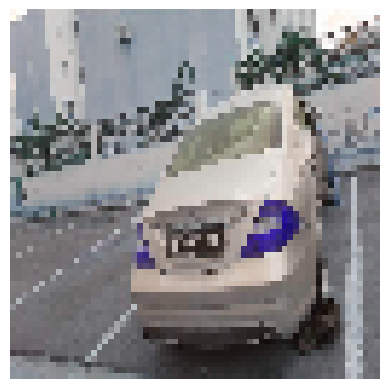

In [5]:
import cv2
import matplotlib.pyplot as plt

# Assuming X_train is a numpy array of images
X_train = X_train.astype('float64')  
X_train = X_train / 255  

# Select the 4th image (index 3) from the training set
test = X_train[3] 


plt.imshow(test, cmap='gray')  
plt.axis('off')  
plt.show()

In [6]:
X_train = np.array(X_train, dtype=np.float64) / 255.0 
Y_train = np.array(Y_train)
indices = np.arange(X_train.shape[0])
np.random.shuffle(indices)
X_train, Y_train = X_train[indices], Y_train[indices]

Y_train = to_categorical(Y_train, num_classes=4)
os.makedirs('model', exist_ok=True)

np.save('model/X.npy', X_train)
np.save('model/Y.npy', Y_train)

print(X_train.shape) 
print(Y_train.shape)  

(2010, 64, 64, 3)
(2010, 4)


In [7]:
classifier = Sequential()
classifier.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))

classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Conv2D(32, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Flatten())
classifier.add(Dense(256, activation='relu'))
classifier.add(Dense(4, activation='softmax'))

print(classifier.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 256)               1

In [8]:
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
hist = classifier.fit(X_train, Y_train, batch_size=16, epochs=50, shuffle=True, verbose=2)

hist

Epoch 1/50
126/126 - 6s - loss: 0.9969 - accuracy: 0.4627 - 6s/epoch - 51ms/step
Epoch 2/50
126/126 - 6s - loss: 0.7469 - accuracy: 0.7025 - 6s/epoch - 44ms/step
Epoch 3/50
126/126 - 5s - loss: 0.5388 - accuracy: 0.8025 - 5s/epoch - 43ms/step
Epoch 4/50
126/126 - 5s - loss: 0.4513 - accuracy: 0.8393 - 5s/epoch - 44ms/step
Epoch 5/50
126/126 - 5s - loss: 0.3878 - accuracy: 0.8577 - 5s/epoch - 42ms/step
Epoch 6/50
126/126 - 5s - loss: 0.3488 - accuracy: 0.8687 - 5s/epoch - 43ms/step
Epoch 7/50
126/126 - 5s - loss: 0.3224 - accuracy: 0.8746 - 5s/epoch - 43ms/step
Epoch 8/50
126/126 - 6s - loss: 0.3024 - accuracy: 0.8811 - 6s/epoch - 44ms/step
Epoch 9/50
126/126 - 5s - loss: 0.2904 - accuracy: 0.8856 - 5s/epoch - 43ms/step
Epoch 10/50
126/126 - 5s - loss: 0.2821 - accuracy: 0.8841 - 5s/epoch - 44ms/step
Epoch 11/50
126/126 - 5s - loss: 0.2593 - accuracy: 0.8960 - 5s/epoch - 44ms/step
Epoch 12/50
126/126 - 6s - loss: 0.2612 - accuracy: 0.8965 - 6s/epoch - 44ms/step
Epoch 13/50
126/126 - 5s 

In [21]:
classifier = Sequential([
    Flatten(input_shape=(64, 64, 3)), 
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  
])

classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
classifier.save('model/license_plates_detection_recognition.h5')

C:\Users\BHANU PRAKASH\.conda\envs\tf-gpu\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [10]:
import os


In [11]:
os.chdir("D:\\DL\\")

In [12]:
import cv2

name = '1.jpg' 
img = cv2.imread(name)

1/1 [==============================] - 0s 63ms/step
Predictions: [[0.6132271]]
Predicted Class: licensePlate recognition


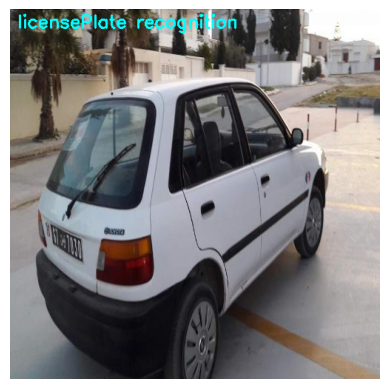

In [20]:

model_path = r"D:\DL\model\license_plates_detection_recognition.h5"
image_path = r"D:\DL\Dataset1\Licplatesdetection_train\license_plates_detection_train\1.jpg"

# Load the image
img = cv2.imread(image_path)

# Check if the image was loaded successfully
if img is None:
    print(f"Error: Unable to load image from {image_path}. Please check the file path.")
    exit()

# Resize the image
img_resized = cv2.resize(img, (64, 64))

# Preprocess the image for the model
XX = np.array(img_resized).reshape(1, 64, 64, 3).astype('float32') / 255

# Load the model
try:
    model = load_model(model_path)
except Exception as e:
    print(f"Error loading model: {e}")
    exit()

# Make predictions
try:
    preds = model.predict(XX)
    predict = int(preds[0][0] > 0.5)  # Assuming binary classification (e.g., license plate recognition vs. detection)
    print(f"Predictions: {preds}")
    print(f"Predicted Class: {'licensePlate recognition' if predict == 1 else 'licensePlate detection'}")
except Exception as e:
    print(f"Error during prediction: {e}")
    exit()

# Display the result using matplotlib (for Jupyter Notebook)
img_resized_for_display = cv2.resize(img, (500, 500))
msg = "licensePlate recognition" if predict == 1 else "licensePlate detection"

# Convert BGR image to RGB for matplotlib
img_resized_for_display_rgb = cv2.cvtColor(img_resized_for_display, cv2.COLOR_BGR2RGB)

# Add text to the image
cv2.putText(img_resized_for_display_rgb, msg, (10, 25), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 255), 2)

# Display the image
plt.imshow(img_resized_for_display_rgb)
plt.axis('off')  # Hide axes
plt.show()

In [14]:
os.chdir("D:\\DL\\")

Found 720 images belonging to 1 classes.
Found 180 images belonging to 1 classes.
Epoch 1/5
23/23 [==============================] - 6s 221ms/step - loss: 60.0309 - accuracy: 0.4625 - val_loss: 51.1860 - val_accuracy: 0.0000e+00
Epoch 2/5
23/23 [==============================] - 5s 201ms/step - loss: 1455.1218 - accuracy: 0.4653 - val_loss: 391.5079 - val_accuracy: 1.0000
Epoch 3/5
23/23 [==============================] - 5s 197ms/step - loss: 10634.8574 - accuracy: 0.5347 - val_loss: 1930.7775 - val_accuracy: 1.0000
Epoch 4/5
23/23 [==============================] - 4s 194ms/step - loss: 48486.1797 - accuracy: 0.5458 - val_loss: 13762.3838 - val_accuracy: 1.0000
Epoch 5/5
23/23 [==============================] - 5s 198ms/step - loss: 142169.0938 - accuracy: 0.5806 - val_loss: 36911.8438 - val_accuracy: 1.0000
Train Accuracy: [0.4625000059604645, 0.4652777910232544, 0.5347222089767456, 0.5458333492279053, 0.5805555582046509]
Validation Accuracy: [0.0, 1.0, 1.0, 1.0, 1.0]


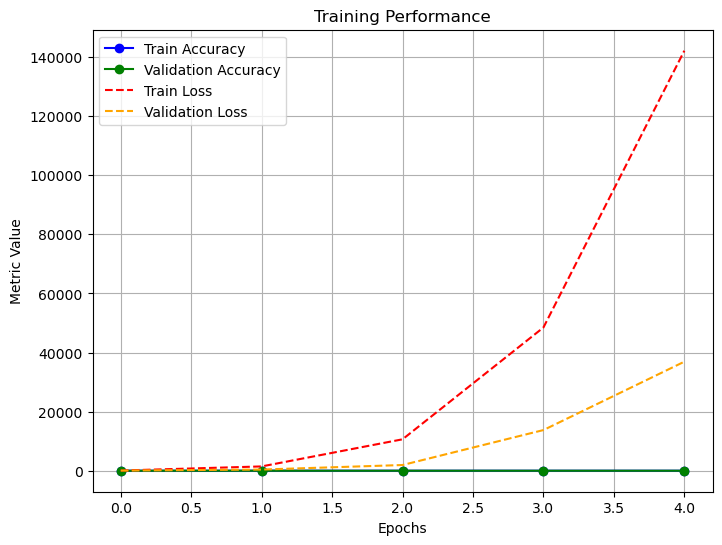

In [17]:
def create_cnn_model(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    return model

# Load Dataset
def load_dataset(data_dir, img_size, batch_size):
    datagen = ImageDataGenerator(rescale=1.0 / 255.0, validation_split=0.2)
    train_generator = datagen.flow_from_directory(data_dir, target_size=img_size, batch_size=batch_size, class_mode='categorical', subset='training')
    val_generator = datagen.flow_from_directory(data_dir, target_size=img_size, batch_size=batch_size, class_mode='categorical', subset='validation')
    return train_generator, val_generator

# Train Model
def train_model(model, train_generator, val_generator, epochs=5):
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(train_generator, epochs=epochs, validation_data=val_generator)
    return history

# Plot Results
def plot_results(history):
    train_acc = history.history.get('accuracy', history.history.get('acc', []))
    val_acc = history.history.get('val_accuracy', history.history.get('val_acc', []))
    train_loss = history.history.get('loss', [])
    val_loss = history.history.get('val_loss', [])

    print("Train Accuracy:", train_acc)
    print("Validation Accuracy:", val_acc)

    plt.figure(figsize=(8, 6))
    
    if train_acc:
        plt.plot(train_acc, label="Train Accuracy", marker='o', color='blue')
    else:
        print("Warning: Train Accuracy data missing!")

    if val_acc:
        plt.plot(val_acc, label="Validation Accuracy", marker='o', color='green')

    if train_loss:
        plt.plot(train_loss, label="Train Loss", linestyle='dashed', color='red')

    if val_loss:
        plt.plot(val_loss, label="Validation Loss", linestyle='dashed', color='orange')

    plt.title("Training Performance")
    plt.xlabel("Epochs")
    plt.ylabel("Metric Value")
    plt.legend()
    plt.grid(True)
    plt.show(block=True)

# Main Function
def main():
    data_dir = r"D:\DL-TASK\Licplatesdetection_train"  # Update this path
    img_size = (64, 64)
    batch_size = 32
    num_classes = 2  # Update as per dataset

    model = create_cnn_model(input_shape=(img_size[0], img_size[1], 3), num_classes=num_classes)
    train_generator, val_generator = load_dataset(data_dir, img_size, batch_size)
    history = train_model(model, train_generator, val_generator)
    plot_results(history)

if __name__ == "__main__":
    main()
